#Predictive Analysis Preprocessing

In this notebook, we will preprocess the reviews dataset  it for sentiment analysis. The steps include preprocessing data, data splitting,and modeling.





## 1. Install and Import Libraries

First, we need to install and import the necessary libraries for data manipulation, visualization, and text processing.


In [152]:
pip install pandas numpy matplotlib seaborn nltk beautifulsoup4 contractions scikit-learn transformers torch sympy imbalanced-learn wordcloud ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re  # Regular expressions for pattern matching.
import nltk  # NLP tasks (tokenization, lemmatization, etc.).
import string  # String constants (e.g., punctuation).
from bs4 import BeautifulSoup  # Parse HTML/XML, clean text.
from nltk.corpus import stopwords, wordnet  # Stopwords and lexical database.
from nltk.tokenize import word_tokenize  # Split text into words.
from nltk.stem import WordNetLemmatizer  # Reduce words to base form.

# For handling contractions
import contractions  # Expand contractions (e.g., "can't" → "cannot").
# Import necessary libraries

import os
import re
from bs4 import BeautifulSoup
import string
from ipywidgets import FileUpload, Output
from IPython.display import display
# Machine learning utilities
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF features.
from sklearn.preprocessing import LabelEncoder  # Encode labels.
from sklearn.model_selection import train_test_split  # Split data.

# Download necessary NLTK data files
nltk.download('punkt')  # Tokenizer models.
nltk.download('stopwords')  # Collection of stopwords for different languages.
nltk.download('wordnet')  # WordNet corpus for lemmatization.
nltk.download('averaged_perceptron_tagger')  # Part-of-speech tagger model.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Setup and Loading dataset

We will load the dataset into a pandas DataFrame and perform some basic exploratory data analysis to understand its structure.


In [154]:
import os
import pandas as pd
import re
import string
from bs4 import BeautifulSoup

# Define multiple folders for raw data
raw_data_folders = ["Data"]  # Add more folders as needed


# Function to clean the review text
def clean_text(text):
    # Expand contractions (placeholder, add logic if needed)
    def expand_contractions(text):
        return text

    text = expand_contractions(text)

    if isinstance(text, str):
        text = text.lower()
        text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML
        text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
        text = text.encode('ascii', 'ignore').decode('ascii')  # Remove emojis/non-ASCII 
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = text.replace('', '')  # Remove double quotes
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Function to clean the dataset
def clean_dataset(df):
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):  # Check if column contains text
            df[col] = df[col].apply(clean_text)
    return df

# Function to process each folder separately
def process_folders():
    for raw_data_folder in raw_data_folders:
        cleaned_data_folder = f"cleaned_{raw_data_folder}"  # Create corresponding cleaned folder

        # Create folders if they don't exist
        os.makedirs(cleaned_data_folder, exist_ok=True)

        # Process each file in the current raw_data_folder
        for file_name in os.listdir(raw_data_folder):
            if file_name.endswith(".csv"):
                raw_file_path = os.path.join(raw_data_folder, file_name)
                cleaned_file_path = os.path.join(cleaned_data_folder, f"cleaned_{file_name}")

                # Load the CSV file
                df = pd.read_csv(raw_file_path)

                # Clean the dataset
                df_cleaned = clean_dataset(df)

                # Save cleaned data
                df_cleaned.to_csv(cleaned_file_path, index=False)

                # Notify the user
                print(f"File '{file_name}' cleaned and saved to '{cleaned_data_folder}'.")
                print(df_cleaned.head())  # Display a preview of the cleaned data

# Run the function
process_folders()

File 'ChemicalEngineering-Area1-Level1.csv' cleaned and saved to 'cleaned_Data'.
   Level                                    Recommendations
0      1  a better understanding on the level or degree ...
1      1  the effectiveness of the vmgo in attracting en...
2      1  the depth and strength of the influence of the...
3      1  the vmgo may be made more attractive if dissem...
4      1  the mission of mmsu may be revisited to make i...
File 'ChemicalEngineering-Area1-Level2.csv' cleaned and saved to 'cleaned_Data'.
   Level                                    Recommendations
0      2  it is recommended that the program and activit...
1      2  a more specific objective can be formulated to...
2      2  it is recommended that modifications be made i...
File 'ChemicalEngineering-Area1-Level3.csv' cleaned and saved to 'cleaned_Data'.
   Level                                    Recommendations
0      3  invitations to many stakeholders like alumni i...
1      3  presentation of appropriate

## 3. Data Cleaning

The raw text data contains noise such as HTML tags, URLs, punctuation, numbers, and extra whitespace. We will clean the text data by performing the following steps:

1. **Expand Contractions**: Convert contractions (e.g., "don't") to their expanded forms ("do not").
2. **Lowercase Text**: Convert all text to lowercase for uniformity.

3. **Remove Punctuation**: Remove punctuation marks.
4. **Remove Numbers**: Remove numerical digits.
5. **Remove Extra Whitespace**: Clean up irregular spacing.


Apply the `clean_text` function to the 'Level' column to clean the text data.


## 4. Tokenization

Tokenization involves splitting the cleaned text into individual words (tokens) for further analysis.


In [155]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [156]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK package
nltk.download('punkt')

# Define the raw data folders
raw_data_folders = ["Data"]  # Add more as needed

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text) if isinstance(text, str) else text

# Function to tokenize an entire dataset
def tokenize_dataset(df):
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):  # Process only text columns
            df[col] = df[col].apply(tokenize_text)
    return df

# Process each cleaned data folder separately
for raw_data_folder in raw_data_folders:
    cleaned_data_folder = f"cleaned_{raw_data_folder}"  # Corresponding cleaned folder
    tokenized_data_folder = f"tokenized_{raw_data_folder}"  # Corresponding tokenized folder

    # Create tokenized data folder if it doesn't exist
    os.makedirs(tokenized_data_folder, exist_ok=True)

    # Process each file in the cleaned data folder
    if os.path.exists(cleaned_data_folder):
        for file_name in os.listdir(cleaned_data_folder):
            if file_name.endswith(".csv"):
                cleaned_file_path = os.path.join(cleaned_data_folder, file_name)
                df = pd.read_csv(cleaned_file_path)

                # Tokenize the dataset
                df_tokenized = tokenize_dataset(df)

                # Save tokenized data
                tokenized_file_path = os.path.join(tokenized_data_folder, f"tokenized_{file_name}")
                df_tokenized.to_csv(tokenized_file_path, index=False)

                print(f"File '{file_name}' tokenized and saved to '{tokenized_data_folder}'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


File 'cleaned_ChemicalEngineering-Area1-Level1.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area1-Level2.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area1-Level3.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area1-PSV.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area10-Level1.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area10-Level2.csv' tokenized and saved to 'tokenized_Data'.


File 'cleaned_ChemicalEngineering-Area10-Level3.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area10-PSV.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area2-Level1.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area2-Level2.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area2-Level3.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area2-PSV.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area3-Level1.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area3-Level2.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area3-Level3.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area3-PSV.csv' tokenized and saved to 'tokenized_Data'.
File 'cleaned_ChemicalEngineering-Area4-Level1.csv' tokenized and saved to 't

## 5. Handling Negations

Negation words can significantly alter the meaning of a sentence (e.g., "not good" vs. "good"). We will handle negations by combining negation words with the words that follow them to preserve the negation effect.

We define a function to handle negations by combining negation words with the words that follow them. This helps preserve the sentiment conveyed by phrases like "not good".

We apply the handle_negations function to the tokens and create a new column 'tokens_neg'.


In [157]:
import os
import pandas as pd
import ast  # To safely convert string lists into actual lists
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer
nltk.download('punkt')

# Define raw data folders (adjust as needed)
raw_data_folders = ["Data"]

# Function to handle negations
def handle_negations(tokens):
    negations = {"not", "no", "never", "nothing", "nowhere", "hardly", "scarcely", "barely",
                 "neither", "nor", "cannot", "can't", "don't", "doesn't", "didn't", "won't",
                 "wouldn't", "shan't", "shouldn't", "mightn't", "mustn't"}
    
    transformed_tokens = []
    skip_next = False
    
    for i in range(len(tokens)):
        word = tokens[i]
        if skip_next:
            skip_next = False
            continue
        if word in negations and i + 1 < len(tokens):
            combined_word = word + '_' + tokens[i + 1]  # Combine negation with next word
            transformed_tokens.append(combined_word)
            skip_next = True  # Skip next word since it's already merged
        else:
            transformed_tokens.append(word)
    
    return transformed_tokens

# Function to process dataset and handle negations
def process_negations(df):
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):  # Apply only to text columns
            df[col] = df[col].apply(process_text_column)
    return df

# Function to process each text column
def process_text_column(text):
    if isinstance(text, str):
        try:
            tokens = ast.literal_eval(text)  # Convert string list to actual list
            if isinstance(tokens, list):  # Ensure conversion was successful
                tokens = handle_negations(tokens)  # Apply negation handling
                return ' '.join(tokens)  # Reconstruct string
        except (SyntaxError, ValueError):  # If conversion fails, return original text
            pass
    return text

# Process each tokenized folder separately
for raw_data_folder in raw_data_folders:
    tokenized_data_folder = f"tokenized_{raw_data_folder}"  # Corresponding tokenized folder
    negation_data_folder = f"negation_{raw_data_folder}"  # Corresponding negation folder

    # Create negation data folder if it doesn't exist
    os.makedirs(negation_data_folder, exist_ok=True)

    # Process each file in the tokenized folder
    if os.path.exists(tokenized_data_folder):
        for file_name in os.listdir(tokenized_data_folder):
            if file_name.endswith(".csv"):
                tokenized_file_path = os.path.join(tokenized_data_folder, file_name)
                df = pd.read_csv(tokenized_file_path)

                # Process negations
                df_negation = process_negations(df)

                # Save processed data
                negation_file_path = os.path.join(negation_data_folder, f"negation_{file_name}")
                df_negation.to_csv(negation_file_path, index=False)

                print(f"File '{file_name}' processed for negations and saved to '{negation_data_folder}'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


File 'tokenized_cleaned_ChemicalEngineering-Area1-Level1.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area1-Level2.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area1-Level3.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area1-PSV.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area10-Level1.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area10-Level2.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area10-Level3.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area10-PSV.csv' processed for negations and saved to 'negation_Data'.
File 'tokenized_cleaned_ChemicalEngineering-Area2-Level1.csv' processed fo

## 6. Lemmatization

We perform lemmatization to reduce words to their base or dictionary form, which helps in normalizing the text data.

 **Advantages of Lemmatization:**
*   Produces more accurate and meaningful results compared to stemming.
*   Helps in reducing vocabulary size, making text analysis more efficient.
*   Improves the performance of NLP models by ensuring that related words are treated as the same term.

###Function to Get WordNet POS Tag

To lemmatize accurately, it's often necessary to know the part of speech of the word (e.g., noun, verb, adjective).

We define a function to get the appropriate WordNet POS tag for each word.

In [158]:
import os
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

# Define raw data folders (adjust as needed)
raw_data_folders = ["Data"]

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_tokens(tokens):
    """Lemmatize tokens while keeping 2-letter words unchanged"""
    lemmatized_tokens = []
    for token in tokens:
        if len(token) > 2:  # Exclude 2-letter words
            pos_tag = get_wordnet_pos(token)  # Get POS tag for the token
            lemmatized_token = lemmatizer.lemmatize(token, pos_tag)  # Lemmatize the token
        else:
            lemmatized_token = token  # Keep the token as is
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens

# Function to process dataset and apply lemmatization
def process_lemmatization(df):
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].apply(lambda text: ' '.join(lemmatize_tokens(nltk.word_tokenize(text))) if isinstance(text, str) else text)
    return df

# Process each negation folder separately
for raw_data_folder in raw_data_folders:
    negation_data_folder = f"negation_{raw_data_folder}"  # Corresponding negation folder
    lemmatized_data_folder = f"lemmatized_{raw_data_folder}"  # Corresponding lemmatized folder

    # Create lemmatized data folder if it doesn't exist
    os.makedirs(lemmatized_data_folder, exist_ok=True)

    # Process each file in the negation data folder
    if os.path.exists(negation_data_folder):
        for file_name in os.listdir(negation_data_folder):
            if file_name.endswith(".csv"):
                negation_file_path = os.path.join(negation_data_folder, file_name)
                df = pd.read_csv(negation_file_path)

                # Apply lemmatization
                df_lemmatized = process_lemmatization(df)

                # Save lemmatized data
                lemmatized_file_path = os.path.join(lemmatized_data_folder, f"lemmatized_{file_name}")
                df_lemmatized.to_csv(lemmatized_file_path, index=False)

                print(f"File '{file_name}' lemmatized and saved to '{lemmatized_data_folder}'.")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


File 'negation_tokenized_cleaned_ChemicalEngineering-Area1-Level1.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area1-Level2.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area1-Level3.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area1-PSV.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area10-Level1.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area10-Level2.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area10-Level3.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area10-PSV.csv' lemmatized and saved to 'lemmatized_Data'.
File 'negation_tokenized_cleaned_ChemicalEngineering-Area2-Level1.csv' lemmatized and save

## 7. Stop Word Removal

Stop words are common words that may not add significant meaning to the text analysis (e.g., "the", "and", "is"). We will remove these words to focus on the more meaningful words. Additionally, we will add custom stop words relevant to movie reviews.

We remove common words (stop words) that may not contribute significantly to the analysis.

We apply the stop word removal function to the lemmatized tokens.



In [159]:
import os
import pandas as pd
import ast
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Define raw data folders
raw_data_folders = ["Data"]

# Load stop words
stop_words = set(stopwords.words('english'))

# Add custom stop words
custom_stop_words = ['bscs', 'cs', 'bs', 'bsit', 'it', 'and', 'are', 'vmgo', 'like', 'may', 'many', 'well', 'use', 'of', 'a', 'is', 'if', 'the']
stop_words.update(custom_stop_words)

def remove_stopwords(tokens):
    """Remove stopwords from tokenized text."""
    return [word for word in tokens if word.lower() not in stop_words]

def process_stopwords(df):
    """Apply stopword removal to all text columns."""
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].apply(lambda text: process_text_column(text))
    return df

def process_text_column(text):
    """Process each text entry to remove stopwords."""
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenize plain text
        tokens = remove_stopwords(tokens)  # Remove stopwords
        return ' '.join(tokens)  # Reconstruct string
    return text

# Process each lemmatized folder separately
for raw_data_folder in raw_data_folders:
    lemmatized_data_folder = f"lemmatized_{raw_data_folder}"  # Corresponding lemmatized folder
    stopwords_data_folder = f"stopwords_{raw_data_folder}"  # Corresponding stopwords folder

    # Create stopwords-removed data folder if it doesn't exist
    os.makedirs(stopwords_data_folder, exist_ok=True)

    # Process each file in the lemmatized data folder
    if os.path.exists(lemmatized_data_folder):
        for file_name in os.listdir(lemmatized_data_folder):
            if file_name.endswith(".csv"):
                lemmatized_file_path = os.path.join(lemmatized_data_folder, file_name)
                df = pd.read_csv(lemmatized_file_path)

                # Apply stopword removal
                df_stopwords_removed = process_stopwords(df)

                # Save processed data
                stopwords_file_path = os.path.join(stopwords_data_folder, f"stopwords_{file_name}")
                df_stopwords_removed.to_csv(stopwords_file_path, index=False)

                print(f"File '{file_name}' stopwords removed and saved to '{stopwords_data_folder}'.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-Level1.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-Level2.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-Level3.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-PSV.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area10-Level1.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area10-Level2.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area10-Level3.csv' stopwords removed and saved to 'stopwords_Data'.
File 'lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area10-PSV.csv' sto

## 8. Reconstructing the Final Preprocessed Text

After preprocessing, we will join the tokens back into a single string for each review. This is necessary for certain modeling techniques that require text input in string format.


In [160]:
import os
import pandas as pd
import ast

# Define raw data folders
raw_data_folders = ["Data"]

def reconstruct_text(df):
    """Reconstruct text from tokenized data."""
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]):  # Ensure column is text-based
            df[col] = df[col].apply(lambda text: process_text_column(text))
    return df

def process_text_column(text):
    """Convert tokenized lists back to sentences."""
    if isinstance(text, str):
        try:
            tokens = ast.literal_eval(text)  # Convert string representation of list to actual list
            if isinstance(tokens, list):
                return ' '.join(tokens)  # Reconstruct text
        except (SyntaxError, ValueError):  
            pass  # Return original text if conversion fails
    return text

# Process each stopwords-removed folder separately
for raw_data_folder in raw_data_folders:
    stopwords_data_folder = f"stopwords_{raw_data_folder}"  # Corresponding stopwords folder
    reconstructed_data_folder = f"reconstructed_{raw_data_folder}"  # Corresponding reconstructed folder

    # Create reconstructed data folder if it doesn't exist
    os.makedirs(reconstructed_data_folder, exist_ok=True)

    # Process each file in the stopwords-removed folder
    if os.path.exists(stopwords_data_folder):
        for file_name in os.listdir(stopwords_data_folder):
            if file_name.endswith(".csv"):
                stopwords_file_path = os.path.join(stopwords_data_folder, file_name)
                df = pd.read_csv(stopwords_file_path)

                # Reconstruct the text
                df_reconstructed = reconstruct_text(df)

                # Extract original name (removing unnecessary prefixes)
                name_parts = file_name.replace(".csv", "").split("_")  # Remove file extension and split by underscores
                course_area_level = "-".join([part for part in name_parts if "-" in part])  # Keep parts with dashes

                # Ensure valid format
                if course_area_level:
                    new_file_name = f"{course_area_level}.csv"
                else:
                    new_file_name = file_name  # Fallback in case of unexpected format

                # Save the reconstructed data
                reconstructed_file_path = os.path.join(reconstructed_data_folder, new_file_name)
                df_reconstructed.to_csv(reconstructed_file_path, index=False)

                print(f"File '{file_name}' reconstructed and saved as '{new_file_name}' in '{reconstructed_data_folder}'.")


File 'stopwords_lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-Level1.csv' reconstructed and saved as 'ChemicalEngineering-Area1-Level1.csv' in 'reconstructed_Data'.
File 'stopwords_lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-Level2.csv' reconstructed and saved as 'ChemicalEngineering-Area1-Level2.csv' in 'reconstructed_Data'.
File 'stopwords_lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-Level3.csv' reconstructed and saved as 'ChemicalEngineering-Area1-Level3.csv' in 'reconstructed_Data'.
File 'stopwords_lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area1-PSV.csv' reconstructed and saved as 'ChemicalEngineering-Area1-PSV.csv' in 'reconstructed_Data'.
File 'stopwords_lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area10-Level1.csv' reconstructed and saved as 'ChemicalEngineering-Area10-Level1.csv' in 'reconstructed_Data'.
File 'stopwords_lemmatized_negation_tokenized_cleaned_ChemicalEngineering-Area10-Level2.c

## 4. Tokenization

Tokenization involves splitting the cleaned text into individual words (tokens) for further analysis.


In [161]:
import os
import pandas as pd

# List of reconstructed folders to process
reconstructed_folders = ["reconstructed_Data"]

for folder in reconstructed_folders:
    if not os.path.exists(folder):
        print(f"Skipping {folder}, folder does not exist.")
        continue

    # Get all CSV files in the current folder
    csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]
    
    dfs = []  # Store processed DataFrames

    for file_name in csv_files:
        file_path = os.path.join(folder, file_name)
        df = pd.read_csv(file_path)

        # Extract Course and Area from file name (assuming format: "Course-AreaX-Level.csv")
        parts = file_name.replace(".csv", "").split("-")
        
        if len(parts) >= 3:
            course = parts[0]  # First part before the dash is the Course
            area = parts[1]  # Second part is the Area

            # Add extracted values as new columns
            df['Course'] = course
            df['Area'] = area
        else:
            print(f"Skipping file {file_name} in {folder} due to unexpected naming format.")
            continue  # Skip files that don’t match the expected format

        # Append to list
        dfs.append(df)

    # If there are valid files, merge and save them
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        merged_csv_path = os.path.join(folder, f"merged_{folder}.csv")  # Save in the same folder
        merged_df.to_csv(merged_csv_path, index=False)
        print(f"Merged file saved as '{merged_csv_path}'.")


Skipping file merged_reconstructed_Data.csv in reconstructed_Data due to unexpected naming format.
Merged file saved as 'reconstructed_Data\merged_reconstructed_Data.csv'.


In [162]:
import os
import pandas as pd

# List of reconstructed folders to process
reconstructed_folders = ["reconstructed_Data"]

# Initialize an empty list to store the dataframes for merging later
dfs = []

# Process each folder
for folder in reconstructed_folders:
    if not os.path.exists(folder):
        print(f"Skipping {folder}, folder does not exist.")
        continue

    # Get all CSV files in the current folder
    csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

    for file_name in csv_files:
        file_path = os.path.join(folder, file_name)
        df = pd.read_csv(file_path)

        # Extract Course and Area from file name (assuming format: "Course-AreaX-Level.csv")
        parts = file_name.replace(".csv", "").split("-")
        
        if len(parts) >= 3:
            course = parts[0]  # First part before the dash is the Course
            area = parts[1]  # Second part is the Area

            # Add extracted values as new columns
            df['Course'] = course
            df['Area'] = area
        else:
            print(f"Skipping file {file_name} in {folder} due to unexpected naming format.")
            continue  # Skip files that don’t match the expected format

        # Append the DataFrame to the list of DataFrames
        dfs.append(df)

# If there are valid DataFrames, merge and save them
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)

    # Now merge SOCIOABEL and COE together into one file
    # Save the merged dataframe to a new CSV file in the same directory
    merged_csv_path = 'merged_final.csv'
    merged_df.to_csv(merged_csv_path, index=False)
    print(f"✅ Merged file saved as '{merged_csv_path}'.")
else:
    print("⚠️ No valid files found to merge.")


Skipping file merged_reconstructed_Data.csv in reconstructed_Data due to unexpected naming format.
✅ Merged file saved as 'merged_final.csv'.


# 9. TF-IDF

## WITHOUT K-MEANS

In [163]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv("merged_final.csv")

# Encode levels to ensure numerical comparisons
df['Level'] = pd.to_numeric(df['Level'].replace({'psv': 0}), errors='coerce').fillna(0).astype(int)

# Vectorizer setup (using TF-IDF for semantic similarity)
vectorizer = TfidfVectorizer(stop_words='english')

def get_topics(df_filtered, num_topics=5, num_words=5):
    # Fit and transform the recommendations to get topic-word distributions
    X = vectorizer.fit_transform(df_filtered['Recommendations'])
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topics.append([feature_names[i] for i in topic.argsort()[-num_words:]])  # Top words for each topic
    return topics

# Extract topics by Course, Area, and Level
topic_dict = {}
for (course, area, level), group in df.groupby(['Course', 'Area', 'Level']):
    topic_dict[(course, area, level)] = get_topics(group)

# Function to calculate semantic similarity between two sets of topics
def calculate_topic_similarity(topic1, topic2):
    # Combine topics into single strings to calculate similarity
    topic1_str = ' '.join(topic1)
    topic2_str = ' '.join(topic2)
    
    # Transform topics into TF-IDF vectors
    tfidf_matrix = vectorizer.transform([topic1_str, topic2_str])
    
    # Calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity

# Track topic occurrences with improved reoccurrence logic
results = []
for (course, area, level), topics in topic_dict.items():
    for topic_words in topics:
        in_levels = {lvl: 0 for lvl in range(1, 5)}
        reoccurs = 0
        similarity_threshold = 0.7  # Define a threshold for cosine similarity
        
        for check_level in range(1, 5):
            if (course, area, check_level) in topic_dict:
                for other_topic in topic_dict[(course, area, check_level)]:
                    similarity = calculate_topic_similarity(topic_words, other_topic)
                    
                    # If similarity exceeds the threshold, mark it as reoccurring
                    if similarity > similarity_threshold:
                        in_levels[check_level] = 1
                        if check_level > level:
                            reoccurs = 1
        
        # Store results for each topic
        results.append([course, area, ', '.join(topic_words), in_levels[1], in_levels[2], in_levels[3], in_levels[4], reoccurs])

# Create DataFrame for results
columns = ['Course', 'Area', 'Topic', 'In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4', 'Reoccurs']
topic_tracking_df = pd.DataFrame(results, columns=columns)

# --- Additional Feature Engineering ---

# Feature 1: Topic length (number of words)
topic_tracking_df['Topic_Length'] = topic_tracking_df['Topic'].apply(lambda x: len(x.split()))

# Feature 2: Frequency of topic in the entire dataset
topic_freq = topic_tracking_df['Topic'].value_counts()
topic_tracking_df['Topic_Frequency'] = topic_tracking_df['Topic'].map(topic_freq)

# Feature 3: Appears in multiple levels (binary flag)
topic_tracking_df['Appears_Multiple_Levels'] = (
    topic_tracking_df[['In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4']].sum(axis=1) > 1
).astype(int)

# Save results
topic_tracking_df.to_csv("lda_topic_tracking_semantic.csv", index=False)


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Features and target
#X = topic_tracking_df[['In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4']]
#y = topic_tracking_df['Reoccurs']
X = topic_tracking_df[['In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4',
                       'Topic_Length', 'Topic_Frequency', 'Appears_Multiple_Levels']]
y = topic_tracking_df['Reoccurs']


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": BernoulliNB(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, output_dict=True)
    }

results


{'Logistic Regression': {'Accuracy': 0.8864628820960698,
  'Report': {'0': {'precision': 1.0,
    'recall': 0.8834080717488789,
    'f1-score': 0.9380952380952381,
    'support': 223.0},
   '1': {'precision': 0.1875,
    'recall': 1.0,
    'f1-score': 0.3157894736842105,
    'support': 6.0},
   'accuracy': 0.8864628820960698,
   'macro avg': {'precision': 0.59375,
    'recall': 0.9417040358744395,
    'f1-score': 0.6269423558897242,
    'support': 229.0},
   'weighted avg': {'precision': 0.9787117903930131,
    'recall': 0.8864628820960698,
    'f1-score': 0.9217902835691849,
    'support': 229.0}}},
 'Naive Bayes': {'Accuracy': 0.8820960698689956,
  'Report': {'0': {'precision': 1.0,
    'recall': 0.8789237668161435,
    'f1-score': 0.9355608591885441,
    'support': 223.0},
   '1': {'precision': 0.18181818181818182,
    'recall': 1.0,
    'f1-score': 0.3076923076923077,
    'support': 6.0},
   'accuracy': 0.8820960698689956,
   'macro avg': {'precision': 0.5909090909090909,
    'reca

In [165]:
# Just guess Reoccurs = 1 if topic appears in multiple levels
topic_tracking_df['BaselineGuess'] = topic_tracking_df['Appears_Multiple_Levels']
accuracy = (topic_tracking_df['BaselineGuess'] == topic_tracking_df['Reoccurs']).mean()
print(f"Baseline heuristic accuracy: {accuracy:.2f}")


Baseline heuristic accuracy: 0.97


In [166]:
import pandas as pd

# Extract and format results for readability
model_performance = []

for name, result in results.items():
    report = result["Report"]
    accuracy = result["Accuracy"]
    precision_1 = report["1"]["precision"]
    recall_1 = report["1"]["recall"]
    f1_score_1 = report["1"]["f1-score"]
    
    model_performance.append([name, f"{accuracy:.1%}", f"{precision_1:.3f}", f"{recall_1:.2f}", f"{f1_score_1:.2f}"])

# Create a DataFrame for better formatting
performance_df = pd.DataFrame(model_performance, columns=["Model", "Accuracy", "Precision (1)", "Recall (1)", "F1-Score (1)"])
performance_df


,Model,Accuracy,Precision (1),Recall (1),F1-Score (1)
0,Logistic Regression,88.6%,0.188,1.00,0.32
1,Naive Bayes,88.2%,0.182,1.00,0.31
2,Random Forest,88.6%,0.188,1.00,0.32


In [167]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation for each model
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = {
        "Mean Accuracy": f"{np.mean(scores):.3f}",
        "Std Dev": f"{np.std(scores):.3f}"
    }

# Display cross-validation results
pd.DataFrame.from_dict(cv_results, orient='index')


,Mean Accuracy,Std Dev
Logistic Regression,0.965,0.007
Naive Bayes,0.972,0.011
Random Forest,0.879,0.018


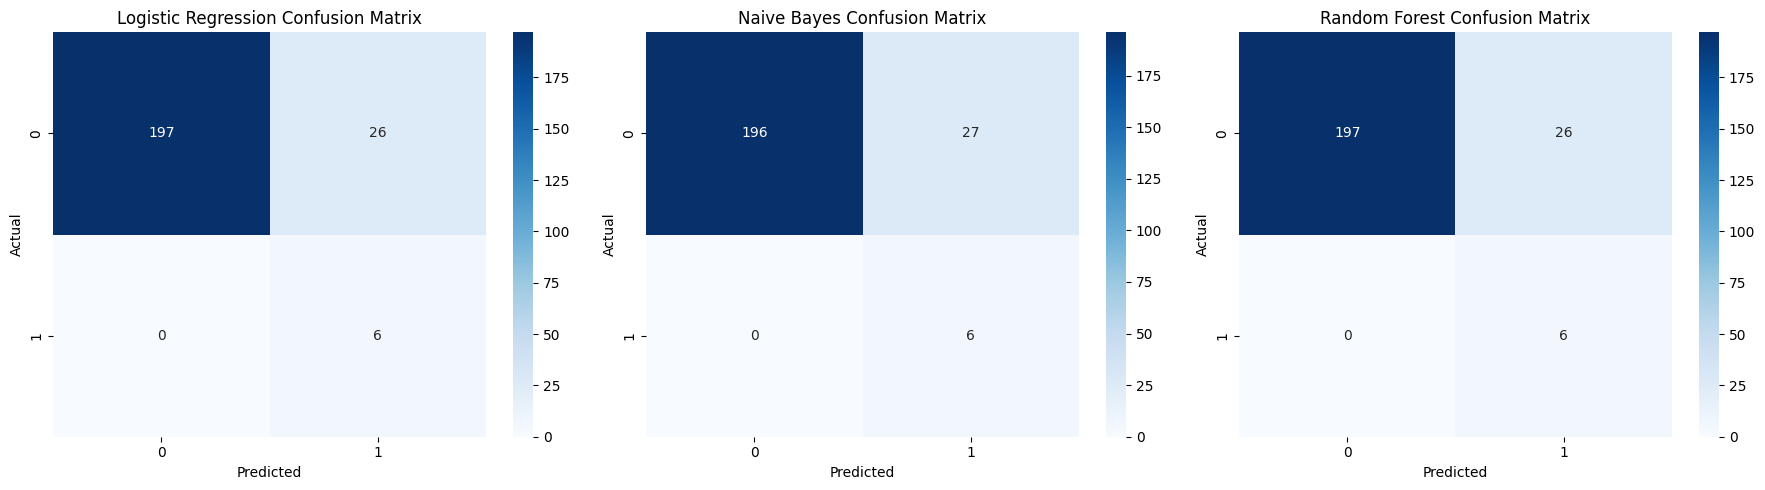

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for all models
conf_matrices = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


## USES LOGISTIC REGRESSION

In [169]:
# Distribution of target variable (before resampling)
label_counts = y.value_counts().sort_index()
label_percent = y.value_counts(normalize=True).sort_index() * 100

# Print results
print("Distribution of 'Reoccurs' labels:")
for label in label_counts.index:
    label_name = "Not Reoccur" if label == 0 else "Reoccur"
    print(f"{label_name} ({label}): {label_counts[label]} ({label_percent[label]:.2f}%)")


Distribution of 'Reoccurs' labels:
Not Reoccur (0): 1104 (96.42%)
Reoccur (1): 41 (3.58%)


In [170]:
import pandas as pd

# Get the trained Logistic Regression model
logistic_model = models["Logistic Regression"]

# Predict probabilities and labels
y_proba = logistic_model.predict_proba(X_test)[:, 1]  # probability for class 1 ("Reoccur")
y_pred = logistic_model.predict(X_test)

# Generate labels
prediction_labels = ['Reoccur' if pred == 1 else 'Not Reoccur' for pred in y_pred]

# Prepare the result DataFrame
output_df = topic_tracking_df.loc[X_test.index, ['Course', 'Topic']].copy()
output_df['Prediction_Label'] = prediction_labels
output_df['Probability'] = y_proba

# Sort by course for display
output_df = output_df.sort_values(by='Course')

# Show predictions grouped by course
for course in output_df['Course'].unique():
    print(f"\nCourse: {course}")
    print(output_df[output_df['Course'] == course][['Topic', 'Prediction_Label', 'Probability']].to_string(index=False))



Course: ChemicalEngineering
                                                     Topic Prediction_Label  Probability
   information, provide, social, educational, occupational      Not Reoccur     0.030330
          document, project, properly, regular, monitoring      Not Reoccur     0.053167
            sustain, program, collection, regular, subject      Not Reoccur     0.030330
      laboratory, department, teach, continuously, faculty      Not Reoccur     0.121177
              maybe, report, evaluation, analyze, complete      Not Reoccur     0.053167
     standard, procedureprocess, unit, preparation, budget      Not Reoccur     0.053167
             activity, indicate, include, picture, caption      Not Reoccur     0.053167
 administration, additional, exist, prioritize, instrument      Not Reoccur     0.198418
         participation, welfare, evident, student, conduct          Reoccur     0.548628
  sociocultural, utilized, publication, sufficiently, unit      Not Reoccur     0

In [171]:
output_df

,Course,Topic,Prediction_Label,Probability
88,ChemicalEngineering,"information, provide, social, educational, occ...",Not Reoccur,0.030330
139,ChemicalEngineering,"document, project, properly, regular, monitoring",Not Reoccur,0.053167
156,ChemicalEngineering,"sustain, program, collection, regular, subject",Not Reoccur,0.030330
54,ChemicalEngineering,"laboratory, department, teach, continuously, f...",Not Reoccur,0.121177
136,ChemicalEngineering,"maybe, report, evaluation, analyze, complete",Not Reoccur,0.053167
...,...,...,...,...
1099,Therapy,"want, strategic, college, consider, university",Reoccur,0.762458
1109,Therapy,"sponsor, educational, extend, administration, ...",Reoccur,0.762458
1111,Therapy,"make, graduate, university, program, curriculum",Not Reoccur,0.053167
1110,Therapy,"workbook, manual, faculty, administration, uni...",Reoccur,0.641316


## WORD2VEC

In [172]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Load the dataset
df = pd.read_csv("merged_final.csv")

# Encode levels to ensure numerical comparisons
df['Level'] = pd.to_numeric(df['Level'].replace({'psv': 0}), errors='coerce').fillna(0).astype(int)

# Preprocess text into tokens for Word2Vec
df['tokens'] = df['Recommendations'].fillna('').apply(lambda x: simple_preprocess(x))

# Train Word2Vec model
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4, seed=42)

# Function to compute average word vectors for each document
def document_vector(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Compute embeddings
df['embedding'] = df['tokens'].apply(lambda x: document_vector(x, model))

# Expand embeddings into separate columns
embedding_df = pd.DataFrame(df['embedding'].tolist(), index=df.index)
embedding_df.columns = [f'embedding_{i}' for i in range(embedding_df.shape[1])]

# Combine with original metadata
final_df = pd.concat([df[['Course', 'Area', 'Level']], embedding_df], axis=1)

# Export to CSV
final_df.to_csv("word2vec_embeddings.csv", index=False)


In [173]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv("merged_final.csv")

# Encode levels to ensure numerical comparisons
df['Level'] = pd.to_numeric(df['Level'].replace({'psv': 0}), errors='coerce').fillna(0).astype(int)



# Vectorizer setup
vectorizer = CountVectorizer(stop_words='english')

def get_topics(df_filtered, num_topics=5, num_words=5):
    X = vectorizer.fit_transform(df_filtered['Recommendations'])
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topics.append([feature_names[i] for i in topic.argsort()[-num_words:]])
    return topics

# Extract topics by Course, Area, and Level
topic_dict = {}
for (course, area, level), group in df.groupby(['Course', 'Area', 'Level']):
    topic_dict[(course, area, level)] = get_topics(group)

# Track topic occurrences
results = []
for (course, area, level), topics in topic_dict.items():
    for topic_words in topics:
        in_levels = {lvl: 0 for lvl in range(1, 5)}
        reoccurs = 0
        
        for check_level in range(1, 5):
            if (course, area, check_level) in topic_dict:
                for other_topic in topic_dict[(course, area, check_level)]:
                    if any(word in other_topic for word in topic_words):
                        in_levels[check_level] = 1
                        if check_level > level:
                            reoccurs = 1
        
        results.append([course, area, ', '.join(topic_words), in_levels[1], in_levels[2], in_levels[3], in_levels[4], reoccurs])

# Create DataFrame for results
columns = ['Course', 'Area', 'Topic', 'In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4', 'Reoccurs']
topic_tracking_df = pd.DataFrame(results, columns=columns)

# Save results
topic_tracking_df.to_csv("lda_topic_tracking_2.csv", index=False)

In [174]:
# Step 1: Load the topic tracking file
topic_df = pd.read_csv("lda_topic_tracking_2.csv")

# Step 2: Compute Reoccurs per (Course, Area, Level) group
# If ANY topic reoccurs in a group, mark the whole group as 1
group_reoccurs = topic_df.groupby(['Course', 'Area', 'In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4', 'Reoccurs']) \
                         .first().reset_index()

# Clean to (Course, Area, Level) → Reoccurs
group_reoccurs = topic_df.groupby(['Course', 'Area'])['Reoccurs'].max().reset_index()

# Step 3: Load the word2vec embeddings
embedding_df = pd.read_csv("word2vec_embeddings.csv")

# Step 4: Merge embeddings with reoccurrence info
merged_df = pd.merge(embedding_df, group_reoccurs, on=['Course', 'Area'], how='left')

# Fill missing Reoccurs values with 0 (if any)
merged_df['Reoccurs'] = merged_df['Reoccurs'].fillna(0).astype(int)

# Step 5: Export to a new file
merged_df.to_csv("word2vec_with_reoccurs.csv", index=False)


In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the Word2Vec feature CSV
df = pd.read_csv("word2vec_with_reoccurs.csv")

# Set X as the embedding features
X = df[[col for col in df.columns if col.startswith("embedding_")]]

# Set y as the binary target: 1 if a topic reoccurs, 0 otherwise
y = df['Reoccurs']  # Ensure this column is in your CSV. If not, merge it in.


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [177]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [178]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [179]:
evaluate_model("Logistic Regression", lr, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("Naive Bayes", nb, X_test, y_test)



Logistic Regression Results:
Accuracy: 0.7212543554006968
Precision: 0.7212543554006968
Recall: 1.0
F1 Score: 0.8380566801619433
Confusion Matrix:
 [[  0  80]
 [  0 207]]

Random Forest Results:
Accuracy: 0.6585365853658537
Precision: 0.704119850187266
Recall: 0.9082125603864735
F1 Score: 0.7932489451476793
Confusion Matrix:
 [[  1  79]
 [ 19 188]]

Naive Bayes Results:
Accuracy: 0.4808362369337979
Precision: 0.7636363636363637
Recall: 0.4057971014492754
F1 Score: 0.5299684542586751
Confusion Matrix:
 [[ 54  26]
 [123  84]]


## TF-IDF + WORD2VEC

In [180]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
df = pd.read_csv('merged_final.csv')

# Use the correct column containing text
text_column = 'Recommendations'  # change this if it's different
df[text_column] = df[text_column].astype(str)

# ----------------------------
# 1. TF-IDF Feature Extraction
# ----------------------------
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df[text_column])
feature_names = tfidf.get_feature_names_out()

# ----------------------------
# 2. Train Word2Vec
# ----------------------------
tokenized_texts = [text.split() for text in df[text_column]]
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

# ----------------------------
# 3. Get word embeddings for common words
# ----------------------------
common_words = list(set(feature_names).intersection(set(word_vectors.key_to_index)))
embeddings = np.array([word_vectors[word] for word in common_words])

# ----------------------------
# 4. Cluster word embeddings
# ----------------------------
n_clusters = 5  # you can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# ----------------------------
# 5. Reoccurrence Labeling
# ----------------------------
# Define reoccur as any word that appears more than once in the dataset
word_counts = df[text_column].str.split().explode().value_counts()
reoccur_labels = [1 if word_counts.get(word, 0) > 1 else 0 for word in common_words]

# ----------------------------
# 6. Create Output DataFrame
# ----------------------------
output_df = pd.DataFrame({
    'word': common_words,
    'cluster': labels,
    'reoccur': reoccur_labels
})

print(output_df.head())


        word  cluster  reoccur
0   drinking        0        1
1      prove        2        1
2      large        2        1
3  developed        4        1
4  occupancy        4        1


In [181]:
output_df

,word,cluster,reoccur
0,drinking,0,1
1,prove,2,1
2,large,2,1
3,developed,4,1
4,occupancy,4,1
...,...,...,...
2296,not_evident,2,0
2297,asean,2,1
2298,row,2,0
2299,world,2,1


In [182]:
# Same as before
tokenized_texts = [text.split() for text in df['Recommendations']]
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Get unique words and their vectors
unique_words = list(w2v_model.wv.index_to_key)
X_embeddings = np.array([w2v_model.wv[word] for word in unique_words])


In [183]:
from sklearn.cluster import KMeans

n_clusters = 10  # tune based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_embeddings)

cluster_df = pd.DataFrame({
    'word': unique_words,
    'cluster': clusters
})


In [184]:
print(df.columns)


Index(['Level', 'Recommendations', 'Course', 'Area', 'Level '], dtype='object')


In [185]:
df['words'] = df['Recommendations'].str.split()

# Explode to get (doc_id, word) format
exploded = df[['Level', 'Area', 'words']].explode('words')

# Count how many different levels a word appears in
word_reoccurrence = exploded.groupby('words')['Level'].nunique().reset_index()
word_reoccurrence['reoccur'] = (word_reoccurrence['Level'] > 1).astype(int)


In [186]:
merged = cluster_df.merge(word_reoccurrence, left_on='word', right_on='words', how='left')
merged = merged[['word', 'cluster', 'reoccur']].fillna(0)


In [187]:
print(merged)

                        word  cluster  reoccur
0                    faculty        2        1
1                    student        2        1
2                    program        2        1
3                   research        8        1
4                   activity        8        1
...                      ...      ...      ...
2392           wellorganized        9        0
2393  parentteachercommunity        9        0
2394               uniformly        9        0
2395                  openly        9        0
2396  clientelebeneficiaries        9        0

[2397 rows x 3 columns]


In [188]:
from collections import defaultdict

# Group words by clusters
cluster_to_words = defaultdict(list)
for word, cluster in zip(merged['word'], merged['cluster']):
    cluster_to_words[cluster].append(word)

# Define function to summarize clusters (manually or auto-generate topic labels)
def get_topic_label(words, top_n=5):
    # You can improve this by generating phrases or using embedding centroids
    return ', '.join(words[:top_n])

# Create topic summary
topic_summaries = []
for cluster_id, words in cluster_to_words.items():
    sorted_words = sorted(words, key=lambda w: word_counts.get(w, 0), reverse=True)
    label = get_topic_label(sorted_words)
    topic_summaries.append({
        'topic_id': cluster_id,
        'topic_label': label,
        'top_words': sorted_words[:10],  # show more words for review if needed
        'reoccur_count': sum([word_counts.get(w, 0) for w in sorted_words])
    })

topics_df = pd.DataFrame(topic_summaries).sort_values(by='reoccur_count', ascending=False)

print(topics_df[['topic_id', 'topic_label', 'top_words']])


   topic_id                                        topic_label  \
1         8     research, activity, college, document, conduct   
2         6  encourage, additional, instructional, evaluati...   
8         3       nbc, growth, sustainability, define, visitor   
6         5  extinguisher, continue, prepare, consultation,...   
7         0                ca, separate, drill, devise, filing   
4         7  instruction, guidance, fund, documentation, di...   
5         4   project, complete, personnel, involve, operation   
9         9          suit, discourage, affair, body, workplace   
3         1     administration, fire, regular, staff, possible   
0         2              faculty, student, program, laboratory   

                                           top_words  
1  [research, activity, college, document, conduc...  
2  [encourage, additional, instructional, evaluat...  
8  [nbc, growth, sustainability, define, visitor,...  
6  [extinguisher, continue, prepare, consultation... 

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare features and labels
features = np.array([w2v_model.wv[word] for word in merged['word']])
labels = merged['reoccur'].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       224
           1       0.85      0.85      0.85       256

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Features and labels from merged DataFrame
features = np.array([w2v_model.wv[word] for word in merged['word']])
labels = merged['reoccur'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

# Store results
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    results.append({
        "Model": model_name,
        "Accuracy": f"{acc * 100:.1f}%",
        "Precision (1)": round(prec, 3),
        "Recall (1)": round(rec, 2),
        "F1-Score (1)": round(f1, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model Accuracy  Precision (1)  Recall (1)  F1-Score (1)
0  Logistic Regression    79.2%          0.902        0.68          0.78
1          Naive Bayes    74.2%          0.958        0.54          0.69
2        Random Forest    85.4%          0.860        0.87          0.86


In [191]:
from sklearn.ensemble import RandomForestClassifier

# Assume you've already trained this earlier
rf_model = models["Random Forest"]

# Apply prediction on your existing dataframe
df['words'] = df['Recommendations'].str.split()

# Explode for word-level predictions
exploded = df[['Course', 'Area', 'words']].explode('words').dropna()

# Keep only words in Word2Vec vocab
exploded = exploded[exploded['words'].isin(w2v_model.wv.key_to_index)]

# Get embeddings and predict
exploded['embedding'] = exploded['words'].apply(lambda w: w2v_model.wv[w])
X_pred = np.vstack(exploded['embedding'].values)
pred_probs = rf_model.predict_proba(X_pred)[:, 1]  # Probability of Reoccur=1
pred_labels = rf_model.predict(X_pred)

exploded['Prediction_Label'] = ['Reoccur' if label == 1 else 'Not Reoccur' for label in pred_labels]
exploded['Probability'] = pred_probs

# Group by Course: Concatenate predicted "Reoccur" words into topic
grouped = (
    exploded.groupby(['Course', 'Area', 'Prediction_Label'])
    .agg({
        'words': lambda x: ', '.join(sorted(set(x))),
        'Probability': 'mean'
    })
    .reset_index()
)

# Optional: Only keep one row per course, e.g., the highest confidence per label
# If you want one row per course and label
final_output = grouped.rename(columns={
    'Area': 'Topic',
    'words': 'Topic_Words'
})

# Format probability
final_output['Probability'] = final_output['Probability'].round(6)

# Preview
print(final_output[['Course', 'Topic', 'Topic_Words', 'Prediction_Label', 'Probability']].head())


                Course   Topic  \
0  ChemicalEngineering   Area1   
1  ChemicalEngineering   Area1   
2  ChemicalEngineering  Area10   
3  ChemicalEngineering  Area10   
4  ChemicalEngineering   Area2   

                                         Topic_Words Prediction_Label  \
0  attitude, character, depth, habit, idea, jingl...      Not Reoccur   
1  acceptability, activity, adequate, agency, alo...          Reoccur   
2  custodian, enroll, entry, event, frontline, go...      Not Reoccur   
3  accreditation, action, activity, address, admi...          Reoccur   
4  aspire, blend, bookstore, bsche, candidate, ca...      Not Reoccur   

   Probability  
0     0.231000  
1     0.966446  
2     0.171429  
3     0.976086  
4     0.063611  


In [192]:
final_output

,Course,Topic,Prediction_Label,Topic_Words,Probability
0,ChemicalEngineering,Area1,Not Reoccur,"attitude, character, depth, habit, idea, jingl...",0.231000
1,ChemicalEngineering,Area1,Reoccur,"acceptability, activity, adequate, agency, alo...",0.966446
2,ChemicalEngineering,Area10,Not Reoccur,"custodian, enroll, entry, event, frontline, go...",0.171429
3,ChemicalEngineering,Area10,Reoccur,"accreditation, action, activity, address, admi...",0.976086
4,ChemicalEngineering,Area2,Not Reoccur,"aspire, blend, bookstore, bsche, candidate, ca...",0.063611
...,...,...,...,...,...
211,Therapy,Area6,Not Reoccur,"benchmarking, clientelebeneficiaries, creation...",0.131538
212,Therapy,Area6,Reoccur,"activity, additional, adopt, also, care, comme...",0.971286
213,Therapy,Area7,Reoccur,"acquisition, administration, also, approval, a...",0.974375
214,Therapy,Area8,Reoccur,"additional, administration, amenity, athletics...",0.970638


## WITH K-MEANS

In [193]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv("merged_final.csv")

# Encode levels to ensure numerical comparisons
df['Level'] = pd.to_numeric(df['Level'].replace({'psv': 0}), errors='coerce').fillna(0).astype(int)



# Vectorizer setup
vectorizer = CountVectorizer(stop_words='english')

def get_topics(df_filtered, num_topics=5, num_words=5):
    X = vectorizer.fit_transform(df_filtered['Recommendations'])
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topics.append([feature_names[i] for i in topic.argsort()[-num_words:]])
    return topics

# Extract topics by Course, Area, and Level
topic_dict = {}
for (course, area, level), group in df.groupby(['Course', 'Area', 'Level']):
    topic_dict[(course, area, level)] = get_topics(group)

# Track topic occurrences
results = []
for (course, area, level), topics in topic_dict.items():
    for topic_words in topics:
        in_levels = {lvl: 0 for lvl in range(1, 5)}
        reoccurs = 0
        
        for check_level in range(1, 5):
            if (course, area, check_level) in topic_dict:
                for other_topic in topic_dict[(course, area, check_level)]:
                    if any(word in other_topic for word in topic_words):
                        in_levels[check_level] = 1
                        if check_level > level:
                            reoccurs = 1
        
        results.append([course, area, ', '.join(topic_words), in_levels[1], in_levels[2], in_levels[3], in_levels[4], reoccurs])

# Create DataFrame for results
columns = ['Course', 'Area', 'Topic', 'In_Level_1', 'In_Level_2', 'In_Level_3', 'In_Level_4', 'Reoccurs']
topic_tracking_df = pd.DataFrame(results, columns=columns)

# Save results
topic_tracking_df.to_csv("lda_topic_tracking_2.csv", index=False)

In [194]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Load the dataset
df = pd.read_csv("merged_final.csv")

# Encode levels to ensure numerical comparisons
df['Level'] = pd.to_numeric(df['Level'].replace({'psv': 0}), errors='coerce').fillna(0).astype(int)

# Vectorizer setup
vectorizer = CountVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()

# To store everything
clustered_topic_outputs = []

def get_topics(df_filtered, num_topics=5, num_words=10):
    X = vectorizer.fit_transform(df_filtered['Recommendations'])
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-num_words:]]
        topics.append(top_words)
    return topics

# Extract topics by Course, Area, and Level
topic_dict = {}
for (course, area, level), group in df.groupby(['Course', 'Area', 'Level']):
    topic_dict[(course, area, level)] = get_topics(group)

# Apply KMeans to each topic
for (course, area, level), topics in topic_dict.items():
    for topic_idx, topic_words in enumerate(topics):
        # TF-IDF vectorize the topic words
        tfidf_matrix = tfidf_vectorizer.fit_transform(topic_words)

        # Apply KMeans clustering (e.g., into 3 clusters)
        kmeans = KMeans(n_clusters=min(3, len(topic_words)), random_state=42)
        kmeans.fit(tfidf_matrix)

        # Organize clusters
        clusters = {i: [] for i in range(kmeans.n_clusters)}
        for word, label in zip(topic_words, kmeans.labels_):
            clusters[label].append(word)

        # Prepare output format
        print(f"\nOriginal Topic {topic_idx + 1}: {', '.join(topic_words)}")
        for cluster_id, words in clusters.items():
            print(f"  - Cluster {cluster_id}: {', '.join(words)}")



Original Topic 1: version, translation, dissemination, copy, ilocano, print, sufficient, review, vmgos, correct
  - Cluster 0: version, dissemination, copy, ilocano, print, sufficient, review, vmgos
  - Cluster 1: correct
  - Cluster 2: translation

Original Topic 2: review, correct, discussion, ensure, incorporate, integral, introductory, syllabus, vmgos, course
  - Cluster 0: review, discussion, ensure, incorporate, integral, introductory, syllabus, vmgos
  - Cluster 1: course
  - Cluster 2: correct

Original Topic 3: different, determine, conduct, community, awareness, authority, approval, region, industry, concerned
  - Cluster 0: different, conduct, community, awareness, authority, approval, region, industry
  - Cluster 1: concerned
  - Cluster 2: determine

Original Topic 4: short, possible, mistake, constitute, vital, grammar, edit, committee, present, review
  - Cluster 0: short, mistake, constitute, vital, grammar, edit, committee, present
  - Cluster 1: review
  - Cluster 2:

## WITHOUT K-MEANS

## WITH K-MEANS

## Model Training

## Random

# 10. Model Training
#  11. Performance EValuation

# 12. Prediction

In [195]:
import os

# Path to check
path = r"C:\Users\LENOVO\OneDrive - MARIANO MARCOS STATE UNIVERSITY\Desktop\Thesis\merged_recommendations.csv"

